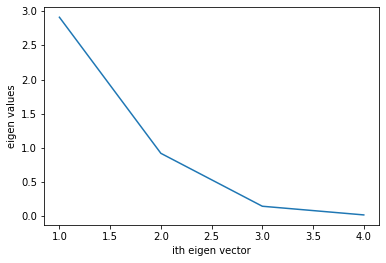

In [1]:
# importing important library
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading csv file
data = pd.read_csv("Iris.csv")
df = data.drop(["Species"], axis=1)

# building and applying  pca model
pca = PCA(n_components=2)
reduced = pca.fit_transform(df)
new_df = pd.DataFrame(reduced, columns=['x1', 'x2'])

# finding correlation matrix for computing eigen vector
corr_matrix = df.corr()
# eigen vectors
val, vec = np.linalg.eig(corr_matrix.to_numpy())

# plotting eigen vector
x = [1, 2, 3, 4]
plt.plot(x, val)
plt.xlabel("ith eigen vector")
plt.ylabel("eigen values")
plt.show()


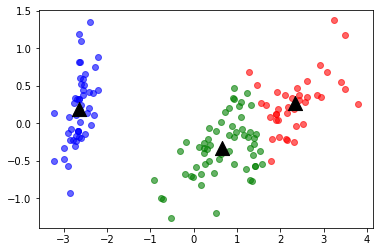

the purity score is 0.8866666666666667


<ipython-input-2-1492f6bbff9d>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_0["x1_j"] = class_0["x1"]-class_0["x1"].mean()
<ipython-input-2-1492f6bbff9d>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_0["x2_j"] = class_0["x2"]-class_0["x2"].mean()
<ipython-input-2-1492f6bbff9d>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [2]:
# importing important library
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading csv file
data = pd.read_csv("Iris.csv")
df = data.drop(["Species"], axis=1)

# coverting species class into numbers for further uses
data["Species"] = data["Species"].replace("Iris-setosa", 0)
data["Species"] = data["Species"].replace("Iris-versicolor", 1)
data["Species"] = data["Species"].replace("Iris-virginica", 2)
data["Species"]

# building and applying  pca model
pca = PCA(n_components=2)
reduced = pca.fit_transform(df)
new_df = pd.DataFrame(reduced, columns=['x1', 'x2'])

# applying k-means clustring on reduced data
K = 3
kmeans = KMeans(n_clusters=K)
kmeans.fit(new_df)
kmeans_prediction = kmeans.predict(new_df)
new_df["predicted_class"] = (pd.Series(kmeans_prediction))

# grouping classes according to obtained clusters
class_ = new_df.groupby(["predicted_class"])
class_0 = class_.get_group(0)
class_1 = class_.get_group(1)
class_2 = class_.get_group(2)
class_mean = new_df.groupby(["predicted_class"]).mean()

# Plotting the data points with different colours for each cluster and  Marking the centres of the clusters in the plot
plt.scatter(class_0["x1"], class_0["x2"], color="r", alpha=0.6)
plt.scatter(class_1["x1"], class_1["x2"], color="b", alpha=0.6)
plt.scatter(class_2["x1"], class_2["x2"], color="g", alpha=0.6)
plt.scatter(class_mean["x1"], class_mean["x2"],
            color="black", alpha=1, marker="^", s=200)
plt.show()

# long way to measure distortion measure
class_0["x1_j"] = class_0["x1"]-class_0["x1"].mean()
class_0["x2_j"] = class_0["x2"]-class_0["x2"].mean()

class_1["x1_j"] = class_1["x1"]-class_1["x1"].mean()
class_1["x2_j"] = class_1["x2"]-class_1["x2"].mean()

class_2["x1_j"] = class_2["x1"]-class_2["x1"].mean()
class_2["x2_j"] = class_2["x2"]-class_2["x2"].mean()

J = 0
J = J+(class_0["x1_j"]*class_0["x1_j"]).sum()
J = J+(class_1["x1_j"]*class_1["x1_j"]).sum()
J = J+(class_2["x1_j"]*class_2["x1_j"]).sum()

J = J+(class_0["x2_j"]*class_0["x2_j"]).sum()
J = J+(class_1["x2_j"]*class_1["x2_j"]).sum()
J = J+(class_2["x2_j"]*class_2["x2_j"]).sum()
J

# compute contingency matrix (also called confusion matrix)


def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(
        y_true, y_pred)

    # Finding optimal one-to-one mapping between cluster labels and true labels
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)

    # Return cluster accuracy
    return contingency_matrix[row_ind, col_ind].sum()/np.sum(contingency_matrix)


# Computing the purity score after examples are assigned to clusters
print("the purity score is", purity_score(
    data["Species"], new_df["predicted_class"]))


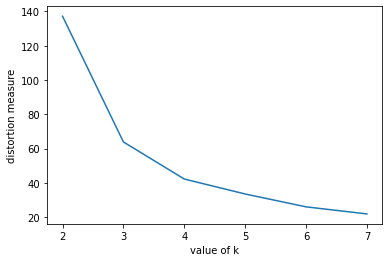

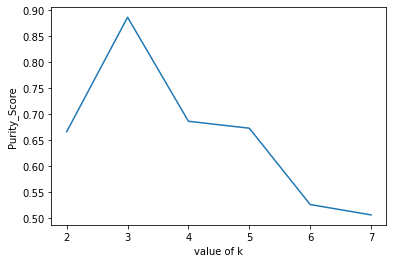

for k= 2   purity score= 0.6666666666666666
for k= 3   purity score= 0.8866666666666667
for k= 4   purity score= 0.6866666666666666
for k= 5   purity score= 0.6733333333333333
for k= 6   purity score= 0.5266666666666666
for k= 7   purity score= 0.5066666666666667


In [3]:
# importing important library
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading csv file
data = pd.read_csv("Iris.csv")
df = data.drop(["Species"], axis=1)

# coverting species class into numbers for further uses
data["Species"] = data["Species"].replace("Iris-setosa", 0)
data["Species"] = data["Species"].replace("Iris-versicolor", 1)
data["Species"] = data["Species"].replace("Iris-virginica", 2)
data["Species"]

# building and applying  pca model
pca = PCA(n_components=2)
reduced = pca.fit_transform(df)
new_df = pd.DataFrame(reduced, columns=['x1', 'x2'])
new_df["predicted_class"] = 0
# compute contingency matrix (also called confusion matrix)


def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(
        y_true, y_pred)  # print(contingency_matrix)

    # Find optimal one-to-one mapping between cluster labels and true labels
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)

    # Return cluster accuracy
    return contingency_matrix[row_ind, col_ind].sum()/np.sum(contingency_matrix)


# applying k-means clustering for different values of k i.e.2,3,4,5,6,7 and obtaing purity score and distortion measure that is further stored in list
K = [2, 3, 4, 5, 6, 7]
Purity_Score = []
Distortion_measure = []
for k in K:
    new_df = new_df.drop(["predicted_class"], axis=1)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(new_df)
    kmeans_prediction = kmeans.predict(new_df)
    new_df["predicted_class"] = (pd.Series(kmeans_prediction))
    class_ = new_df.groupby(["predicted_class"])

    Distortion_measure.append(kmeans.inertia_)
    Purity_Score.append(purity_score(
        data["Species"], new_df["predicted_class"]))

# the plot of K vs distortion measure
plt.plot(K, Distortion_measure)
plt.xlabel("value of k")
plt.ylabel("distortion measure")
plt.show()

# the plot of K vs Purity_Score
plt.plot(K, Purity_Score)
plt.xlabel("value of k")
plt.ylabel("Purity_Score")
plt.show()

# purity score
for i in range(6):
    print("for k=", K[i], "  purity score=", Purity_Score[i])


In [ ]:
# importing important libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# reading csv file
data = pd.read_csv("abalone.csv")
# creating traing and testing data
y = data["Rings"]
X = data.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# function to calculate rmse


def rmse(predictions, targets):
    predictions = np.array(predictions)
    targets = np.array(targets)
    return np.sqrt(((predictions - targets) ** 2).mean())


# for every p in (2,3,4,5) making polyreg model and predicting training data
P = [2, 3, 4, 5]
RMSE1 = []
for p in P:
    poly_features = PolynomialFeatures(p)
    x_poly = poly_features.fit_transform(X_train)
    regressor = LinearRegression()
    regressor.fit(x_poly, y_train)
    predict1 = regressor.predict(poly_features.fit_transform(X_train))
    print("the prediction accuracy on the training data for the different values of degree ofthe polynomial p =",
          p, " using root mean squared error (RMSE) is ", rmse(predict1, y_train))
    RMSE1.append(rmse(predict1, y_train))
plt.bar(P, RMSE1)
plt.xlabel("value of p")
plt.ylabel("RMSE value")
plt.show()


# for every p in (2,3,4,5) making polyreg model and predicting test data
P = [2, 3, 4, 5]
RMSE1 = []
for p in P:
    poly_features = PolynomialFeatures(p)
    x_poly = poly_features.fit_transform(X_train)
    regressor = LinearRegression()
    regressor.fit(x_poly, y_train)
    predict1 = regressor.predict(poly_features.fit_transform(X_test))
    print("the prediction accuracy on the training data for the different values of degree ofthe polynomial p =",
          p, " using root mean squared error (RMSE) is ", rmse(predict1, y_test))
    RMSE1.append(rmse(predict1, y_test))
plt.bar(P, RMSE1)
plt.xlabel("value of p")
plt.ylabel("RMSE value")
plt.show()


# since p=2 has lowest rsme
p = 2
poly_features = PolynomialFeatures(p)
x_poly = poly_features.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)
predict1 = regressor.predict(poly_features.fit_transform(X_test))
plt.scatter(y_test, predict1)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()


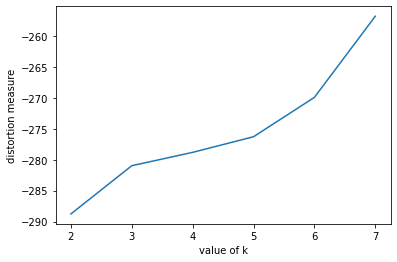

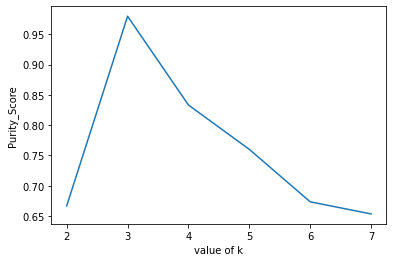

for k= 2   purity score= 0.6666666666666666
for k= 3   purity score= 0.98
for k= 4   purity score= 0.8333333333333334
for k= 5   purity score= 0.76
for k= 6   purity score= 0.6733333333333333
for k= 7   purity score= 0.6533333333333333


In [5]:
# importing important library
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading csv file
data = pd.read_csv("Iris.csv")
df = data.drop(["Species"], axis=1)

# coverting species class into numbers for further uses
data["Species"] = data["Species"].replace("Iris-setosa", 0)
data["Species"] = data["Species"].replace("Iris-versicolor", 1)
data["Species"] = data["Species"].replace("Iris-virginica", 2)
data["Species"]

# building and applying  pca model
pca = PCA(n_components=2)
reduced = pca.fit_transform(df)
new_df = pd.DataFrame(reduced, columns=['x1', 'x2'])
new_df["predicted_class"] = 0


# compute contingency matrix (also called confusion matrix)


def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(
        y_true, y_pred)  # print(contingency_matrix)

    # Find optimal one-to-one mapping between cluster labels and true labels
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)

    # Return cluster accuracy
    return contingency_matrix[row_ind, col_ind].sum()/np.sum(contingency_matrix)


K = [2, 3, 4, 5, 6, 7]
Purity_Score = []
Distortion_measure = []
for k in K:
    new_df = new_df.drop(["predicted_class"], axis=1)
    gmm = GaussianMixture(n_components=k)
    gmm.fit(new_df)
    GMM_prediction = gmm.predict(new_df)
    new_df["predicted_class"] = (pd.Series(GMM_prediction))

    Purity_Score.append(purity_score(
        data["Species"], new_df["predicted_class"]))
    Distortion_measure.append(gmm.lower_bound_*150)

# the plot of K vs distortion measure
plt.plot(K, Distortion_measure)
plt.xlabel("value of k")
plt.ylabel("distortion measure")
plt.show()

# the plot of K vs Purity_Score
plt.plot(K, Purity_Score)
plt.xlabel("value of k")
plt.ylabel("Purity_Score")
plt.show()

# purity score
for i in range(6):
    print("for k=", K[i], "  purity score=", Purity_Score[i])


Purity score for eps=1 and min_samples=4 is 0.667


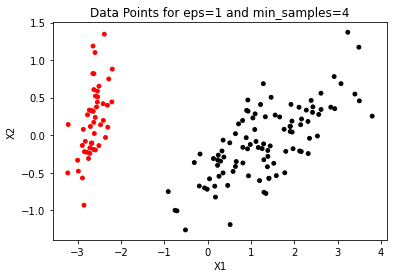

Purity score for eps=1 and min_samples=10 is 0.667


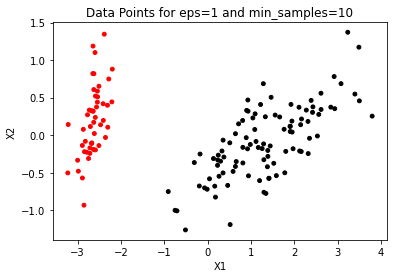

Purity score for eps=5 and min_samples=4 is 0.333


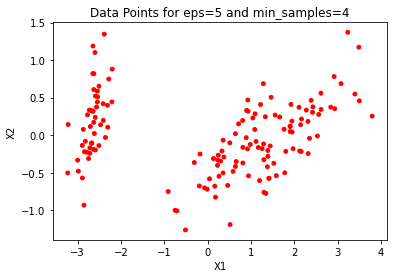

Purity score for eps=5 and min_samples=10 is 0.333


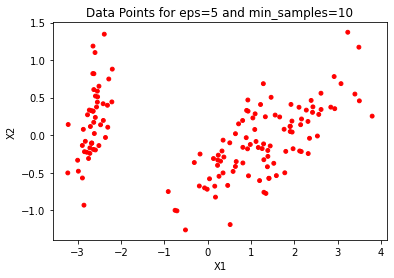

In [6]:
# importing important library
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
import numpy as np
from sklearn.cluster import DBSCAN

# reading csv file
data = pd.read_csv("Iris.csv")
df = data.drop(["Species"], axis=1)

# coverting species class into numbers for further uses
data["Species"] = data["Species"].replace("Iris-setosa", 0)
data["Species"] = data["Species"].replace("Iris-versicolor", 1)
data["Species"] = data["Species"].replace("Iris-virginica", 2)
data["Species"]

# building and applying  pca model
pca = PCA(n_components=2)
reduced = pca.fit_transform(df)
new_df = pd.DataFrame(reduced, columns=['x1', 'x2'])

# compute contingency matrix (also called confusion matrix)


def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(
        y_true, y_pred)  # print(contingency_matrix)

    # Find optimal one-to-one mapping between cluster labels and true labels
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)

    # Return cluster accuracy
    return contingency_matrix[row_ind, col_ind].sum()/np.sum(contingency_matrix)


# On reduced data for different value of eps and min_samples modelling dbscan classifier and plotting data according to the computed classifiers
eps = [1, 1, 5, 5]
min_samples = [4, 10, 4, 10]
for i in range(4):
    dbscan_model = DBSCAN(eps=eps[i], min_samples=min_samples[i]).fit(new_df)
    DBSCAN_predictions = dbscan_model.labels_
    print(f'Purity score for eps={eps[i]} and min_samples={min_samples[i]} is',
          round(purity_score(data["Species"], DBSCAN_predictions), 3))
    plt.scatter(new_df[new_df.columns[0]], new_df[new_df.columns[1]],
                c=DBSCAN_predictions, cmap='flag', s=15)
    plt.title(f'Data Points for eps={eps[i]} and min_samples={min_samples[i]}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
